('Percentage ok for radar: ', 1.0)
('Percentage ok for laser: ', 1.0)


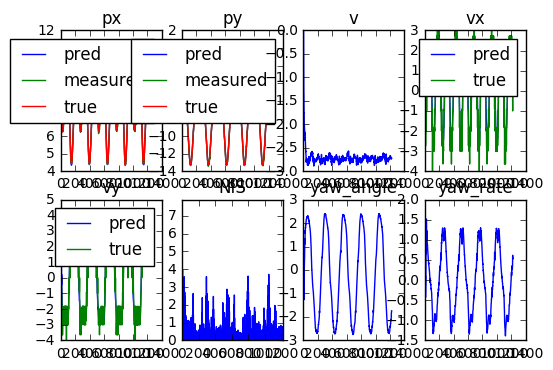

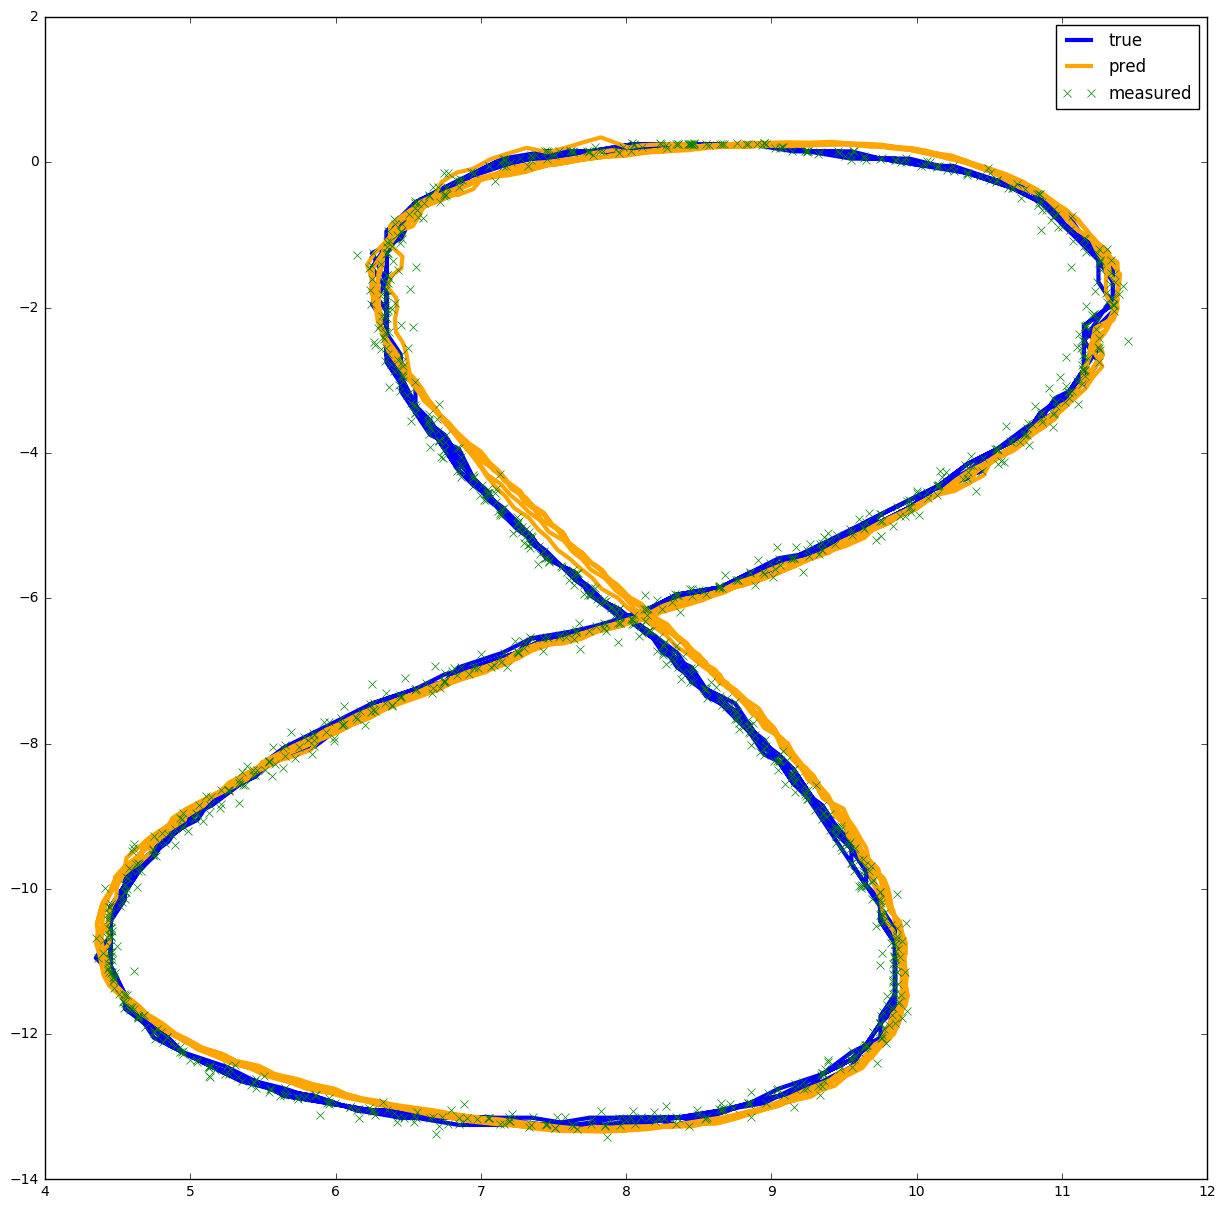

In [4]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import math

csv_path = "../cmake-build-debug/output.txt"

px = []
py = []
v = []
yaw_angle = []
yaw_rate = []
px_measured = []
py_measured = []
px_true = []
py_true = []
vx_true = []
vy_true = []
NIS = []

with open(csv_path,'r') as csvfile:
	csv_reader = csv.reader(csvfile, delimiter='\t',skipinitialspace=True)
	next(csv_reader, None)
	for csv_length,row in enumerate(csv_reader):
		px.append(float(row[0]))
		py.append(float(row[1]))
		v.append(float(row[2]))
		yaw_angle.append(float(row[3]))
		yaw_rate.append(float(row[4]))
		px_measured.append(float(row[5]))
		py_measured.append(float(row[6]))
		px_true.append(float(row[7]))
		py_true.append(float(row[8]))
		vx_true.append(float(row[9]))
		vy_true.append(float(row[10]))
		NIS.append(float(row[11]))
	csvfile.close()

vx_pred = []
vy_pred = []

for vel, yaw in zip(v, yaw_angle):
	vx_pred.append(vel*math.cos(yaw))
	vy_pred.append(vel*math.sin(yaw))

chi_radar = [7.915] * len(px)
chi_laser = [5.991] * len(px)

p_radar = 0
p_laser = 0
for e in NIS:
	if (e < 7.915):
		p_radar += 1.
	if (e < 5.991):
		p_laser += 1.

print ('Percentage ok for radar: ', p_radar/len(NIS))
print ('Percentage ok for laser: ', p_laser/len(NIS))



plt.figure()
#x = np.arange(0,len(NIS)-1)
plt.subplot(2,4,1)
plt.plot(px, label='pred')
plt.plot(px_measured, label='measured')
plt.plot(px_true, label='true')
plt.title('px')
plt.legend()

plt.subplot(2,4,2)
plt.plot(py, label='pred')
plt.plot(py_measured, label='measured')
plt.plot(py_true, label='true')
plt.title('py')
plt.legend()

plt.subplot(2,4,3)
plt.plot(v)
plt.title('v')

plt.subplot(2,4,4)
plt.plot(vx_pred, label='pred')
plt.plot(vx_true, label='true')
plt.title('vx')
plt.legend()

plt.subplot(2,4,5)
plt.plot(vy_pred, label='pred')
plt.plot(vy_true, label='true')
plt.title('vy')
plt.legend()

plt.subplot(2,4,6)
plt.plot(NIS)
plt.plot(chi_radar)
plt.title('NIS')
plt.axis('tight')

plt.subplot(2,4,7)
plt.plot(yaw_angle)
plt.title('yaw_angle')

plt.subplot(2,4,8)
plt.plot(yaw_rate)
plt.title('yaw_rate')


plt.figure(figsize=(15,15))
plt.plot(px_true,py_true, label='true', linewidth=3)
plt.plot(px,py,'r-',color='orange', label='pred',linewidth=3)
plt.plot(px_measured, py_measured, 'gx', label='measured')
plt.legend()
plt.show()

In [6]:
py_true

[0.6]